In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import datashader as ds
import datashader.glyphs
import datashader.transfer_functions as tf
from collections import OrderedDict

np.random.seed(1)
num=10000

dists = {cat: pd.DataFrame(dict(x=np.random.normal(x,s,num),
                                y=np.random.normal(y,s,num),
                                val=val,cat=cat))
         for x,y,s,val,cat in 
         [(2,2,0.01,10,"d1"), (2,-2,0.1,20,"d2"), (-2,-2,0.5,30,"d3"), (-2,2,1.0,40,"d4"), (0,0,3,50,"d5")]}

df = pd.concat(dists,ignore_index=True)
df["cat"]=df["cat"].astype("category")
df.tail()

,x,y,val,cat
49995,-1.397579,0.610189,50,d5
49996,-2.649610,3.080821,50,d5
49997,1.933360,0.243676,50,d5
49998,4.306374,1.032139,50,d5
49999,-0.493567,-2.242669,50,d5


CPU times: user 535 ms, sys: 14 ms, total: 549 ms
Wall time: 567 ms


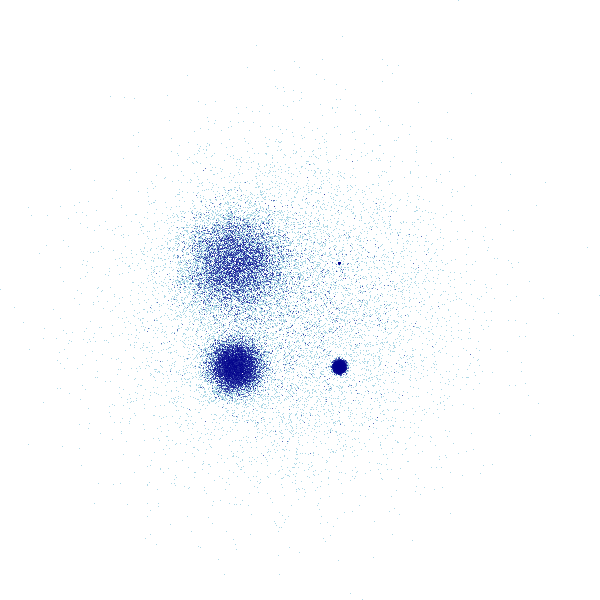

In [2]:
%time tf.shade(ds.Canvas().points(df,'x','y'))


In [3]:
glyph = ds.glyphs.Point('x', 'y')
canvas = ds.Canvas(plot_width=200, plot_height=200, x_range=(-8,8), y_range=(-8,8))


In [4]:
from datashader import reductions
reduction = reductions.count()

from datashader.core import bypixel
agg = bypixel(df, canvas, glyph, reduction)
agg

<xarray.DataArray (y: 200, x: 200)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)
Coordinates:
  * y        (y) float64 -7.96 -7.88 -7.8 -7.72 -7.64 ... 7.72 7.8 7.88 7.96
  * x        (x) float64 -7.96 -7.88 -7.8 -7.72 -7.64 ... 7.72 7.8 7.88 7.96

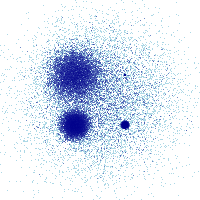

In [5]:
tf.shade(canvas.points(df,'x','y',agg=reductions.count()))


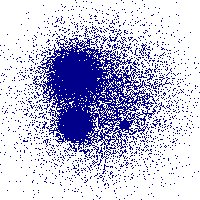

In [6]:
tf.shade(canvas.points(df,'x','y',agg=reductions.any()))


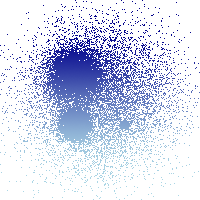

In [7]:
tf.shade(canvas.points(df,'x','y',agg=reductions.mean('y')))


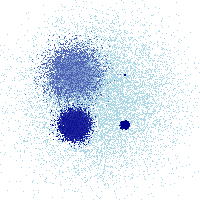

In [8]:
tf.shade(50-canvas.points(df,'x','y',agg=reductions.mean('val')))
